In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
#airline_data_df = pd.read_csv("airline-passenger-traffic.csv")
exchange_rate_data = pd.read_csv("Daily+temperature+data.csv")
#

In [72]:
exchange_rate_data.head(15)


,Date,Temperature(Min)
0,01-01-2017,14.3
1,01-02-2017,17.4
2,01-03-2017,18.5
3,01-04-2017,16.8
4,01-05-2017,11.5
5,01-06-2017,9.5
6,01-07-2017,12.2
7,01-08-2017,15.7
8,01-09-2017,16.3
9,01-10-2017,13.6


In [73]:
exchange_rate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              730 non-null    object 
 1   Temperature(Min)  730 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.5+ KB


In [77]:
exchange_rate_data['Date'] = pd.to_datetime(exchange_rate_data['Date'])

In [78]:
# Time Series ANalysis

In [80]:
exchange_rate_data= exchange_rate_data.set_index('Date')

In [81]:
exchange_rate_data.head()

,Temperature(Min)
Date,
2017-01-01,14.3
2017-01-02,17.4
2017-01-03,18.5
2017-01-04,16.8
2017-01-05,11.5


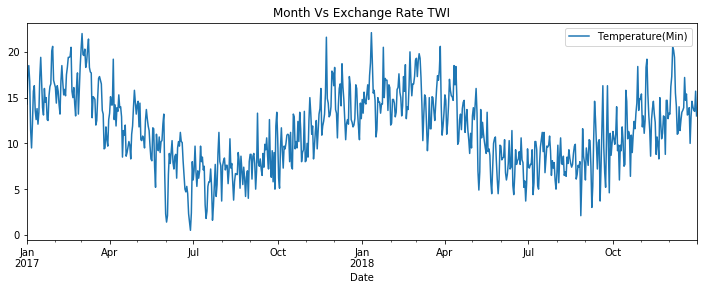

In [82]:
# Plot the axis
exchange_rate_data.plot(figsize=(12,4))
plt.legend(loc='best')
plt.title("Month Vs Exchange Rate TWI")
plt.show()

In [83]:
exchange_rate_data['Temperature(Min)']

Date
2017-01-01    14.3
2017-01-02    17.4
2017-01-03    18.5
2017-01-04    16.8
2017-01-05    11.5
              ... 
2018-12-27    14.0
2018-12-28    13.6
2018-12-29    13.5
2018-12-30    15.7
2018-12-31    13.0
Name: Temperature(Min), Length: 730, dtype: float64

In [10]:
# Outlier Analysis

In [11]:
import seaborn as sns

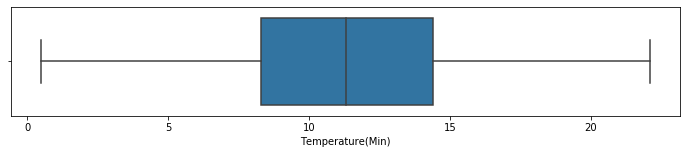

In [84]:
fig= plt.subplots(figsize=(12,2))
ax = sns.boxplot(exchange_rate_data['Temperature(Min)'], whis =1.5)

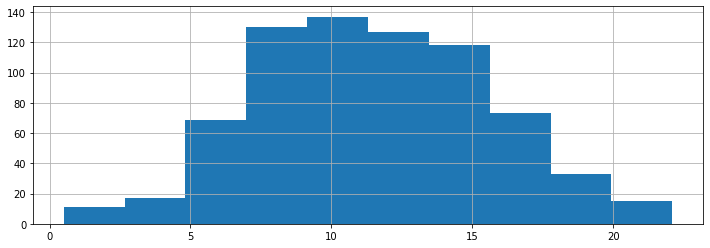

In [85]:
fig = exchange_rate_data['Temperature(Min)'].hist(figsize=(12,4))

In [14]:
# Time Series Decomposition

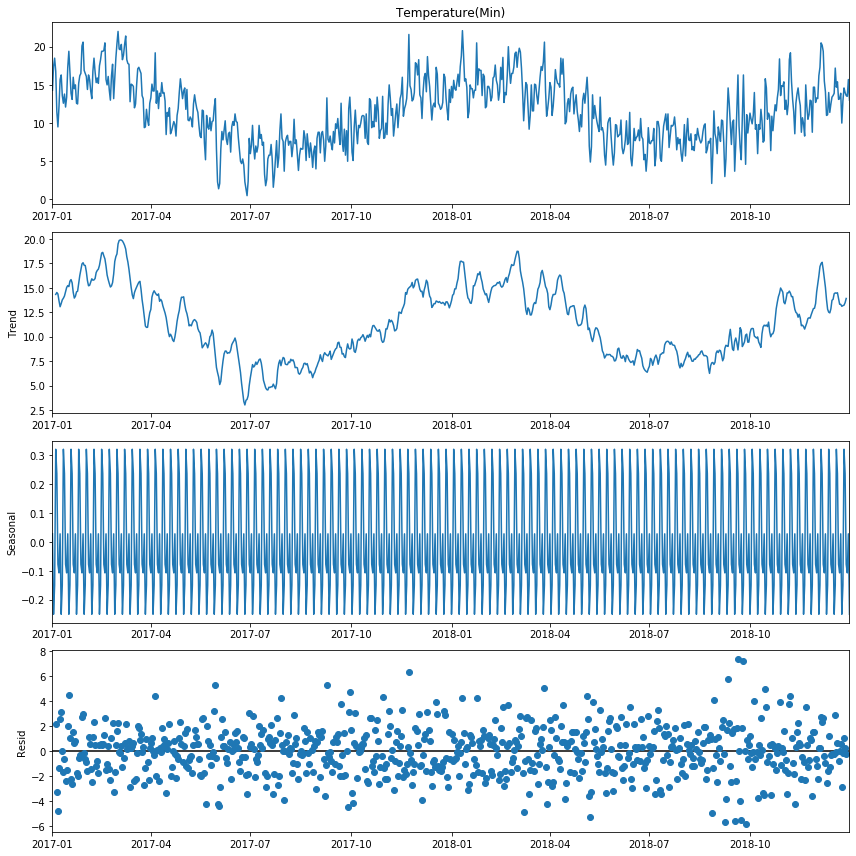

In [86]:
# Additive Seasonal Decompostion
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12,12
decomposition = sm.tsa.seasonal_decompose(exchange_rate_data['Temperature(Min)'], model='additive')
fig = decomposition.plot()
plt.show()

In [89]:
# Multiplicative Seasonal Decompostion
rcParams['figure.figsize'] = 12,12
decomposition = sm.tsa.seasonal_decompose(exchange_rate_data.Temperature(Min), model='multilplcative')
fig = decomposition.plot()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Temperature'

In [ ]:
# Build and evaluate the time series model

In [90]:
# Train test split
train_len = 511
train = exchange_rate_data[:train_len]
test = exchange_rate_data[train_len:]

In [91]:
train.head()

,Temperature(Min)
Date,
2017-01-01,14.3
2017-01-02,17.4
2017-01-03,18.5
2017-01-04,16.8
2017-01-05,11.5


In [101]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Temperature(Min)'])
model_fit = model.fit(smoothing_level =0.15, optimized =False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['forecast'] = model_fit.forecast(len(y_hat_ses))

/home/santosh/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


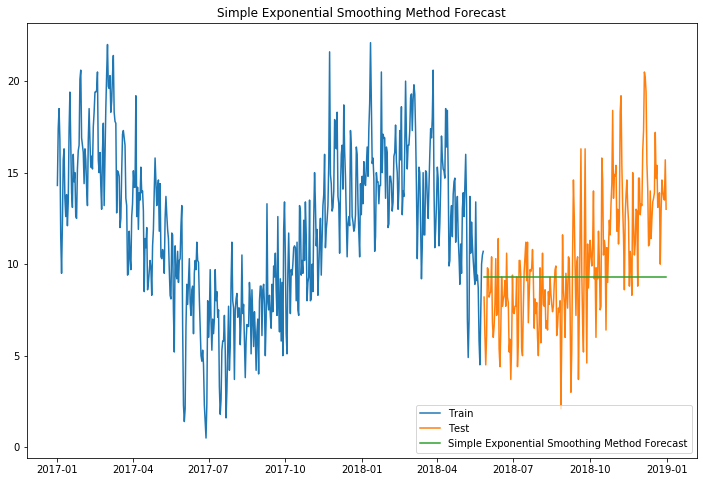

In [102]:
# Plot the forecast
plt.figure(figsize=(12,8))
plt.plot(train['Temperature(Min)'], label= 'Train')
plt.plot(test['Temperature(Min)'], label= 'Test')
plt.plot(y_hat_ses['forecast'], label= 'Simple Exponential Smoothing Method Forecast')
plt.legend(loc='best')
plt.title("Simple Exponential Smoothing Method Forecast")
plt.show()

In [103]:
rmse = np.sqrt(mean_squared_error(test['Temperature(Min)'], y_hat_ses['forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temperature(Min)']-y_hat_ses['forecast'])/test['Temperature(Min)'])*100, 2)
Tempresults = pd.DataFrame({'method':['Simple Exponential Smoothing  Method'], 'RMSE':[rmse], 'MAPE':[mape]})
Tempresults = Tempresults[['method','RMSE', "MAPE"]]  
Tempresults

,method,RMSE,MAPE
0,Simple Exponential Smoothing Method,3.54,30.37


In [104]:
# Exponential Smooting -- Trend & Level
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [109]:
model = ExponentialSmoothing(np.array(train['Temperature(Min)']), seasonal_periods=12, trend = 'additive', seasonal=None)
model_fit = model.fit(smoothing_level =0.5, smoothing_slope = 0.01, optimized =False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.5, 'smoothing_slope': 0.01, 'smoothing_seasonal': None, 'damping_slope': nan, 'initial_level': 14.3, 'initial_slope': 3.099999999999998, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [110]:
rmse = np.sqrt(mean_squared_error(test['Temperature(Min)'], y_hat_holt['forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temperature(Min)']-y_hat_holt['forecast'])/test['Temperature(Min)'])*100, 2)
Tempresults = pd.DataFrame({'method':['Exponential Smoothing  Method Level & Trend'], 'RMSE':[rmse], 'MAPE':[mape]})
Tempresults = Tempresults[['method','RMSE', "MAPE"]]  
Tempresults

,method,RMSE,MAPE
0,Exponential Smoothing Method Level & Trend,4.11,34.17


In [111]:

model = ExponentialSmoothing(np.array(train['Temperature(Min)']), seasonal_periods=30, trend = 'additive', seasonal='additive')
model_fit = model.fit(optimized =True)
print(model_fit.params)
y_hat_holts = test.copy()
y_hat_holts['forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.6745630227755732, 'smoothing_slope': 9.097068409464451e-26, 'smoothing_seasonal': 4.105703238534659e-25, 'damping_slope': nan, 'initial_level': 12.384605595999334, 'initial_slope': 1.7109610688503448e-23, 'initial_seasons': array([3.06522013, 2.57165523, 2.59368224, 3.10381382, 2.57836622,
       2.39973838, 2.50911104, 3.15955761, 3.31016579, 2.99036774,
       3.070814  , 2.81595011, 1.82005577, 2.77113242, 2.96936717,
       2.99693904, 1.94799156, 2.75777592, 2.45572752, 1.77710756,
       1.99842438, 2.83141103, 1.65845736, 0.96227508, 1.82490976,
       1.82903781, 2.09785003, 2.7138174 , 3.22976833, 3.24610929]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [113]:
rmse = np.sqrt(mean_squared_error(test['Temperature(Min)'], y_hat_holts['forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Temperature(Min)']-y_hat_holts['forecast'])/test['Temperature(Min)'])*100, 2)
Tempresults = pd.DataFrame({'method':['Exponential Smoothing  Method Level & Trend'], 'RMSE':[rmse], 'MAPE':[mape]})
Tempresults = Tempresults[['method','RMSE', "MAPE"]]  
Tempresults

,method,RMSE,MAPE
0,Exponential Smoothing Method Level & Trend,3.5,32.83


In [92]:
# Naive Method
y_hat_naive = test.copy()
y_hat_naive['forecast'] = train['Exchange Rate TWI'][train_len]


KeyError: 'Exchange Rate TWI'

In [93]:
train['Exchange Rate TWI'][train_len]

KeyError: 'Exchange Rate TWI'

In [94]:
# Plot the forecast
plt.figure(figsize=(12,8))
plt.plot(train['Exchange Rate TWI'], label= 'Train')
plt.plot(test['Exchange Rate TWI'], label= 'Test')
plt.plot(y_hat_naive['forecast'], label= 'Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Method")
plt.show()

KeyError: 'Exchange Rate TWI'

<Figure size 864x576 with 0 Axes>

In [95]:
# Calculate RMSE and MAPE to evaluate forecast
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_naive['forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_naive['forecast'])/test['Exchange Rate TWI'])*100, 2)
                
results = pd.DataFrame({'method':['Naive Method'], 'RMSE':[rmse], 'MAPE':[mape]})
results = results[['method','RMSE', "MAPE"]]  
results

KeyError: 'Exchange Rate TWI'

In [37]:
# Simple Average method 
y_hat_avg = test.copy()
y_hat_avg['forecast'] = train['Exchange Rate TWI'].mean()

In [38]:
train['Exchange Rate TWI'].mean()

88.32547169811328

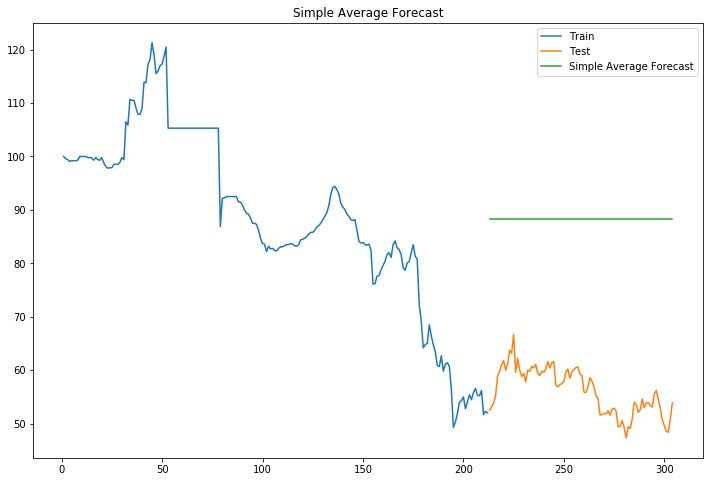

In [39]:
# Plot the forecast
plt.figure(figsize=(12,8))
plt.plot(train['Exchange Rate TWI'], label= 'Train')
plt.plot(test['Exchange Rate TWI'], label= 'Test')
plt.plot(y_hat_avg['forecast'], label= 'Simple Average Forecast')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.show()

In [40]:
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_avg['forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_avg['forecast'])/test['Exchange Rate TWI'])*100, 2)
Tempresults = pd.DataFrame({'method':['Simple Average Method'], 'RMSE':[rmse], 'MAPE':[mape]})
Tempresults = Tempresults[['method','RMSE', "MAPE"]]  
Tempresults

,method,RMSE,MAPE
0,Simple Average Method,32.42,58.12


In [41]:
results = pd.concat([results, Tempresults])
results

,method,RMSE,MAPE
0,Naive Method,5.98,8.41
0,Simple Average Method,32.42,58.12


In [53]:
# Time Series Cross Validation 


In [66]:
y_hat_sma = exchange_rate_data.copy()
m_window = 3
y_hat_sma['sma_forecasting'] = y_hat_sma['Exchange Rate TWI'].rolling(m_window).mean()
# test data is not available so keep the fix value of last forecasted
y_hat_sma['sma_forecasting'][train_len:] = y_hat_sma['sma_forecasting'][train_len-1]

In [67]:
y_hat_sma['sma_forecasting'][train_len-1]

53.39999999999994

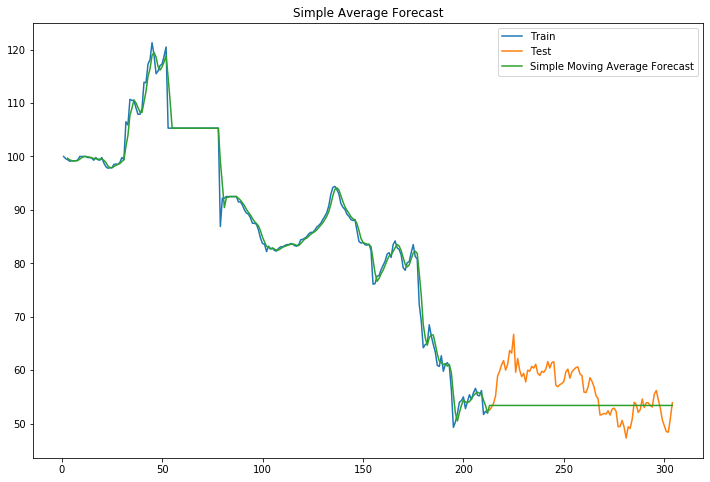

In [68]:
# Plot the forecast
plt.figure(figsize=(12,8))
plt.plot(train['Exchange Rate TWI'], label= 'Train')
plt.plot(test['Exchange Rate TWI'], label= 'Test')
plt.plot(y_hat_sma['sma_forecasting'], label= 'Simple Moving Average Forecast')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.show()

In [69]:
rmse = np.sqrt(mean_squared_error(test['Exchange Rate TWI'], y_hat_sma['sma_forecasting'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Exchange Rate TWI']-y_hat_sma['sma_forecasting'][train_len:])/test['Exchange Rate TWI'])*100, 2)
Tempresults = pd.DataFrame({'method':['Simple Average Method'], 'RMSE':[rmse], 'MAPE':[mape]})
Tempresults = Tempresults[['method','RMSE', "MAPE"]]  
Tempresults

,method,RMSE,MAPE
0,Simple Average Method,5.1,7.32
